In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
X = df.drop('charges' , axis = 1)
y = df['charges']

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler , OneHotEncoder

In [6]:
transformer = make_column_transformer(
    (MinMaxScaler(), ['age', 'bmi', 'children']),
    (OneHotEncoder(handle_unknown = 'ignore'), ['sex', 'smoker', 'region'])
)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
transformer.fit(X_train)

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['age', 'bmi', 'children']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['sex', 'smoker', 'region'])])

In [9]:
X_train_n = transformer.transform(X_train)
X_test_n = transformer.transform(X_test)

In [10]:
X_train_n[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [11]:
X_train_n.shape , X_train.shape

((1070, 11), (1070, 6))

In [12]:
tf.random.set_seed(42)
reg_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])


reg_model.compile(loss = tf.keras.losses.mae,
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ['mae'])

In [13]:
history = reg_model.fit(X_train_n, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 3ms/step - loss: 13343.6680 - mae: 13343.6680
Epoch 2/200
34/34 [==============================] - 0s 3ms/step - loss: 13335.1123 - mae: 13335.1123
Epoch 3/200
34/34 [==============================] - 0s 3ms/step - loss: 13314.1191 - mae: 13314.1191
Epoch 4/200
34/34 [==============================] - 0s 5ms/step - loss: 13270.1064 - mae: 13270.1064
Epoch 5/200
34/34 [==============================] - 0s 3ms/step - loss: 13192.0596 - mae: 13192.0596
Epoch 6/200
34/34 [==============================] - 0s 3ms/step - loss: 13069.0703 - mae: 13069.0703
Epoch 7/200
34/34 [==============================] - 0s 3ms/step - loss: 12890.9629 - mae: 12890.9629
Epoch 8/200
34/34 [==============================] - 0s 3ms/step - loss: 12647.6299 - mae: 12647.6299
Epoch 9/200
34/34 [==============================] - 0s 3ms/step - loss: 12328.8037 - mae: 12328.8037
Epoch 10/200
34/34 [==============================] - 0s 4ms/step - loss: 11929.50

In [14]:
reg_model.evaluate(X_test_n, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3171.3428 - mae: 3171.3428


[3171.3427734375, 3171.3427734375]

In [15]:
y_train.median() , y_train.mean()

(9575.4421, 13346.089736364485)

Text(0.5, 0, 'epochs')

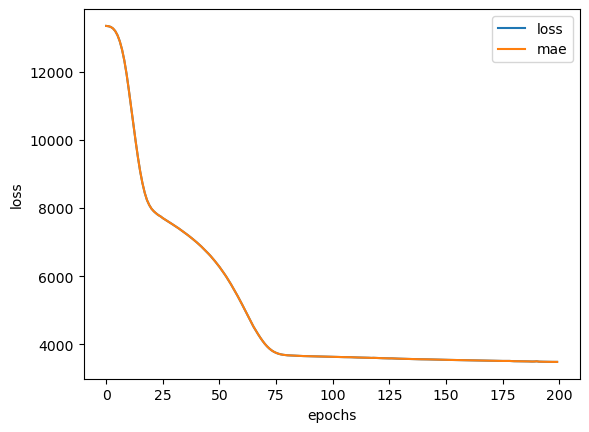

In [16]:
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')


In [ ]:
reg_model.save('İnsurance_model')